In [20]:
import math
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

<h1> Data Manipulation </h1>

In [21]:
data=pd.read_csv("train.csv")
data = data.drop('label',axis=1) #SOM is not supervised so we don't need the labels
Train = np.array(data)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
testdata=pd.read_csv("train.csv")
test = testdata.drop('label',axis=1)
test = np.array(test)

In [23]:
testlabels = testdata['label']
testlabels = np.array(testlabels)
testlabels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

<h1> Parameters And Functions </h1>

since pytorch doesn't have the necessary function to manipulate weights and find the clusters, i tried to write them myself



<h5> winner : </h5> finds the closest cluster to the given sample

<h5> updateWeight : </h5> updates weight according to this equation : <b> New Weight = Old Weight + Alpha * (Error between Sample and current Weight) </b>

In [24]:
TrainingNumber = 100
Clusters = 10 
InputFeatures = 784 
neuronsSize = Clusters*InputFeatures  #number of neurons in som
epochs = 30
alpha = 0.5


    # Function here computes the winning vector 
    # by Euclidean distance 
def winner(weights, sample) : 
    a = [0,0,0,0,0,0,0,0,0,0]
    for i  in range( len( sample ) ) : 
        a[0] = a[0] + math.pow( ( sample[i] - weights[0][i] ), 2 ) 
        a[1] = a[1] + math.pow( ( sample[i] - weights[1][i] ), 2 )
        a[2] = a[2] + math.pow( ( sample[i] - weights[2][i] ), 2 )
        a[3] = a[3] + math.pow( ( sample[i] - weights[3][i] ), 2 )
        a[4] = a[4] + math.pow( ( sample[i] - weights[4][i] ), 2 )
        a[5] = a[5] + math.pow( ( sample[i] - weights[5][i] ), 2 )
        a[6] = a[6] + math.pow( ( sample[i] - weights[6][i] ), 2 )
        a[7] = a[7] + math.pow( ( sample[i] - weights[7][i] ), 2 )
        a[8] = a[8] + math.pow( ( sample[i] - weights[8][i] ), 2 )
        a[9] = a[9] + math.pow( ( sample[i] - weights[9][i] ), 2 )
    return a.index(max(a))
    
def updateWeight(weights, sample, J, alpha ) : 
    for i in range( len (weights[J]) ) : 
        weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )  
    return weights 

<h1> Model </h1>

<p>since there was no adequate pytorch implementation of SOM, i tried to do my best with what was available, the model is created according to picture below</p>

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200630175239/Capture_SOM.png" alt="" class="alignnone size-full wp-image-1969190">

In [25]:
from torch.nn import Sequential,Linear,Bilinear
from torchsummary import summary

model = Sequential(Linear(InputFeatures,Clusters))
summary(model,input_size=(1,InputFeatures))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


<h1> Training the Model </h1>

In [26]:
for i in range (epochs):
    print ("epoch number : ",i)
    for j in range (TrainingNumber):
        sample = Train[j]
        J = winner(model[0].weight.data,sample)
        model[0].weight.data = updateWeight(model[0].weight.data,sample, J, alpha)

epoch number :  0
epoch number :  1
epoch number :  2
epoch number :  3
epoch number :  4
epoch number :  5
epoch number :  6
epoch number :  7
epoch number :  8
epoch number :  9
epoch number :  10
epoch number :  11
epoch number :  12
epoch number :  13
epoch number :  14
epoch number :  15
epoch number :  16
epoch number :  17
epoch number :  18
epoch number :  19
epoch number :  20
epoch number :  21
epoch number :  22
epoch number :  23
epoch number :  24
epoch number :  25
epoch number :  26
epoch number :  27
epoch number :  28
epoch number :  29


<h5> change test[x] for another test and re-run the code to see the result </h5>

the testcase belongs to this cluster :  F


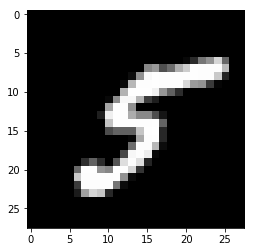

In [27]:
s = test[1440]
def predictWhichCluster(sample):
    predicted = winner (model[0].weight.data , sample)
    return chr(predicted+65)
print("the testcase belongs to this cluster : ", predictWhichCluster(s))
plt.imshow(s.reshape((28,28)),cmap="gray")

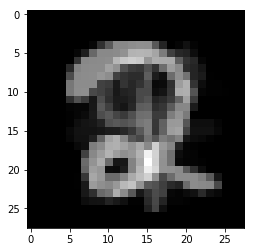

In [28]:
plt.imshow(model[0].weight.data[ord(predictWhichCluster(s))-65].reshape((28,28)),cmap="gray")